In [50]:
import pandas as pd


In [51]:
data=pd.read_csv(r"C:/Users/17831/Downloads/Occupancy_Estimation.csv")
# load data
#data['Date'] = pd.to_datetime(data['Date'])
#change string to date(maybenot)
data.isna().sum()
# checking if we have empty columns
#looks clean so we will proceed

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [52]:
#one hot encoding date variable

unique = data['Date'].unique()

(data['Date'] == unique[0]).astype(int)

for i in unique:
    data[f'one_hot_{i}']= (data['Date'] == i).astype(int)
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S6_PIR,S7_PIR,Room_Occupancy_Count,one_hot_2017/12/22,one_hot_2017/12/23,one_hot_2017/12/24,one_hot_2017/12/25,one_hot_2017/12/26,one_hot_2018/01/10,one_hot_2018/01/11
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0,0,1,1,0,0,0,0,0,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0,0,1,1,0,0,0,0,0,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,...,0,0,0,0,0,0,0,0,0,1
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,...,0,0,0,0,0,0,0,0,0,1


In [63]:
set(data["Room_Occupancy_Count"])

{0, 1, 2, 3}

In [57]:
#making X,y
X=data.drop(columns=["Room_Occupancy_Count","Date","Time"])
y=data["Room_Occupancy_Count"]

In [22]:
from sklearn.model_selection import train_test_split


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [74]:
y_pred=clf.predict(X_test)
    

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9873667587840506

In [ ]:
accuracy_score(y_test,y_pred)

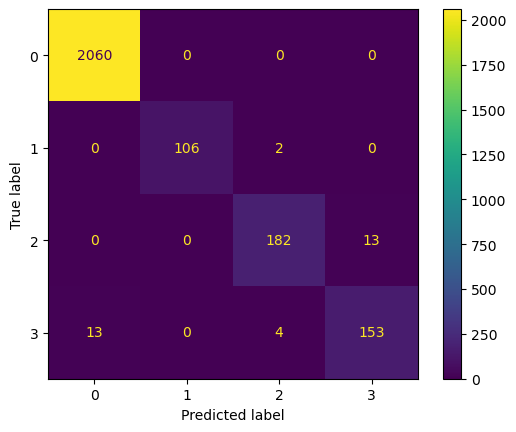

In [76]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


We want to explore a little bit on how well we are doing, therefore we first try the simplist case, in which we just don't take the value of date, time into account but having all the other variables availble to use.

In [77]:
data=pd.read_csv(r"C:/Users/17831/Downloads/Occupancy_Estimation.csv")
X_without_date=data.drop(columns=["Room_Occupancy_Count","Date","Time"])
X_train_nodate, X_test_nodate, y_train_nodate, y_test_nodate = train_test_split(X_without_date, y, random_state=0)

In [78]:
clf_nodate = RandomForestClassifier(max_depth=3, random_state=0)

In [79]:
clf_nodate.fit(X_train_nodate, y_train_nodate)

RandomForestClassifier(max_depth=3, random_state=0)

In [80]:
y_pred_nodate=clf_nodate.predict(X_test_nodate)

In [81]:
accuracy_score(y_test_nodate,y_pred_nodate)

0.9885511251480458

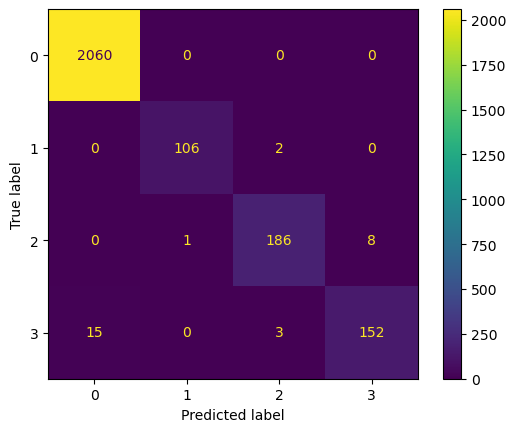

In [82]:
confusion_matrix = metrics.confusion_matrix(y_test_nodate,y_pred_nodate)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

The result suggest that maybe adding the date variable causes some overfitting of our model and therefore decreases the accuracy score. 